In [1]:
## 경고창 무시
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd

# 도미와 빙어 구분하기

In [2]:
fish = pd.read_csv('./Fish.csv', encoding='utf-8')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.drop(columns=['Length1', 'Length3', 'Height', 'Width'])
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
fish = fish.drop(columns=['Length1', 'Length3', 'Height', 'Width'])
fish.head()

,Species,Weight,Length2
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


## 도미 35마리의 길이와 무게를 측정해서 파이썬 리스트로 만듦

In [6]:
bream = fish[fish['Species'] == 'Bream']
bream.head()

,Species,Weight,Length2
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [7]:
bream.rename(columns = {'Weight':'bream_weight', 'Length2':'bream_length'}, inplace=True)
bream.head()

,Species,bream_weight,bream_length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [8]:
import matplotlib.pyplot as plt

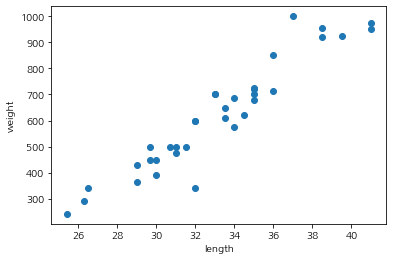

In [9]:
plt.scatter(bream['bream_length'], bream['bream_weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 빙어 14마리의 길이와 무게를 측정해서 파이썬 리스트로 만듦

In [10]:
smelt = fish[fish['Species'] == 'Smelt']
smelt.head()

,Species,Weight,Length2
145,Smelt,6.7,9.8
146,Smelt,7.5,10.5
147,Smelt,7.0,10.6
148,Smelt,9.7,11.0
149,Smelt,9.8,11.2


In [11]:
smelt.rename(columns = {'Weight':'smelt_weight', 'Length2':'smelt_length'}, inplace=True)
smelt.head()

,Species,smelt_weight,smelt_length
145,Smelt,6.7,9.8
146,Smelt,7.5,10.5
147,Smelt,7.0,10.6
148,Smelt,9.7,11.0
149,Smelt,9.8,11.2


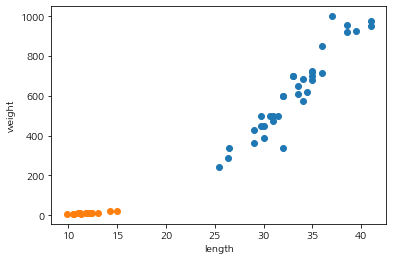

In [12]:
plt.scatter(bream['bream_length'], bream['bream_weight'])
plt.scatter(smelt['smelt_length'], smelt['smelt_weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## K-최근접 이웃 알고리즘

### - 주변에서 가장 가까운 5개의 데이터를 보고 다수결의 원칙에 따라 데이터를 예측

In [13]:
fish['length'] = pd.concat([bream['bream_length'], smelt['smelt_length']], axis=0)
fish['weight'] = pd.concat([bream['bream_weight'], smelt['smelt_weight']], axis=0)

In [14]:
fish.isna().sum()

Species      0
Weight       0
Length2      0
length     110
weight     110
dtype: int64

In [15]:
fish = fish.dropna()
fish.head()

,Species,Weight,Length2,length,weight
0,Bream,242.0,25.4,25.4,242.0
1,Bream,290.0,26.3,26.3,290.0
2,Bream,340.0,26.5,26.5,340.0
3,Bream,363.0,29.0,29.0,363.0
4,Bream,430.0,29.0,29.0,430.0


In [16]:
import numpy as np

In [17]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [18]:
fish_data = np.column_stack((fish['length'], fish['weight']))

In [19]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [20]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [21]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [22]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_X, test_X, train_Y, test_Y = train_test_split(
    fish_data, fish_target, random_state=42)

In [25]:
train_X.shape, test_X.shape

((36, 2), (13, 2))

In [26]:
train_Y.shape, test_Y.shape

((36,), (13,))

In [27]:
print(test_Y)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
train_X, test_X, train_Y, test_Y = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [29]:
print(test_Y)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 수상한 도미 한마리

In [30]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_X, train_Y)
kn.score(test_X, test_Y)

1.0

In [31]:
print(kn.predict([[25, 150]]))

[0.]


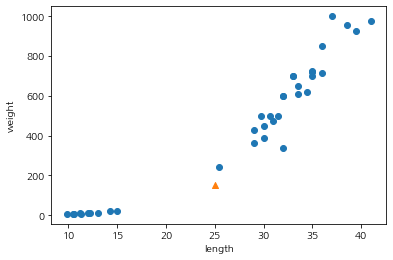

In [32]:
plt.scatter(train_X[:,0], train_X[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [33]:
distances, indexes = kn.kneighbors([[25, 150]])

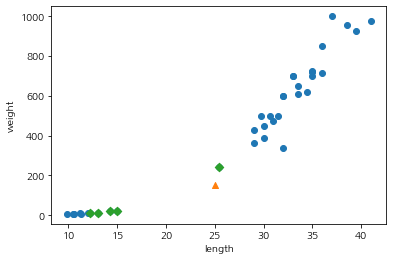

In [34]:
plt.scatter(train_X[:,0], train_X[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_X[indexes,0], train_X[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
print(train_X[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [36]:
print(train_Y[indexes])

[[1. 0. 0. 0. 0.]]


In [37]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 기준을 맞춰라

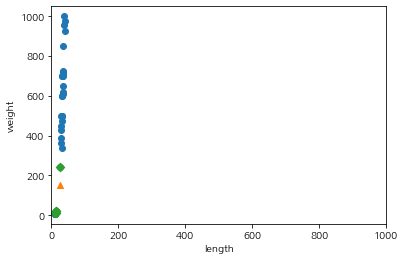

In [38]:
plt.scatter(train_X[:,0], train_X[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_X[indexes,0], train_X[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [39]:
mean = np.mean(train_X, axis=0)
std = np.std(train_X, axis=0)

In [40]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [41]:
train_scaled = (train_X - mean) / std

### 전처리 데이터로 모델 훈련하기

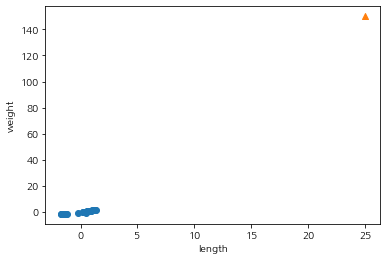

In [42]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
new = ([25, 150] - mean) / std

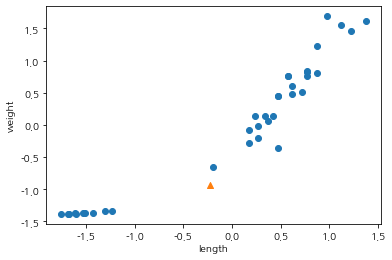

In [44]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [45]:
kn.fit(train_scaled, train_Y)

KNeighborsClassifier()

In [46]:
test_scaled = (test_X - mean) / std

In [47]:
kn.score(test_scaled, test_Y)

1.0

In [48]:
print(kn.predict([new]))

[1.]


In [49]:
distances, indexes = kn.kneighbors([new])

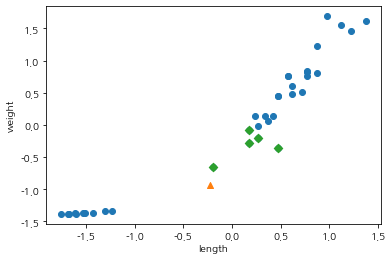

In [50]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()